In [1]:
N = ord("M") % 3 + 1

In [2]:
N

3

In [3]:
!conda install numpy -y

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [4]:
!pip install matplotlib

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt

fileName = "./res/russia_losses_equipment.csv"
columnAPC = "APC"
columnDay = "day"

In [6]:
def getColumnByNameFromCsv(fileName, columnName):
    with open(fileName, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        headers = next(spamreader) 
        columnIndex = headers.index(columnName)
        resultArray = np.array([row[columnIndex] for row in spamreader])
    return resultArray

In [7]:
def getLossesByDay():
    days = getColumnByNameFromCsv(fileName, columnDay)
    APCs = getColumnByNameFromCsv(fileName, columnAPC)
    lastDayNum = int(days[0])
    lastLossesAPCs = int(APCs[0])
    lossesPerDay = lastLossesAPCs // lastDayNum
    print("Втрати за добу: ", lossesPerDay)


In [8]:
getLossesByDay()

Втрати за добу:  18


In [9]:
def getFiveMaxLossesAPC():
    APCs = getColumnByNameFromCsv(fileName, columnAPC).astype(int)
    lossesPerDayArray = APCs[:-1] - APCs[1:]
    lossesPerDayArray = np.append(lossesPerDayArray, APCs[-1] - 0) 
    sortedArray = np.sort(lossesPerDayArray)
    reversedArray = sortedArray[::-1]
    print("П'ять найбільших добових втрат БТР за весь час: ", reversedArray[0:5])

In [10]:
getFiveMaxLossesAPC()

П'ять найбільших добових втрат БТР за весь час:  [516 190 120 110  96]


In [11]:
def findTotalLossesAPCForSummer2023():
    dates = getColumnByNameFromCsv(fileName, 'date')
    APCs = getColumnByNameFromCsv(fileName, 'APC').astype(int)

    date_array = np.array(dates)
    
    summer_mask = (date_array >= '2023-06-01') & (date_array <= '2023-08-31')

    summer_something_values = APCs[summer_mask]

    if summer_something_values.size > 0:
        max_value = np.max(summer_something_values)
        return max_value
    else:
        return None

In [12]:
res = findTotalLossesAPCForSummer2023()
print(res)

8604


In [13]:
def findAverageLossesAPCInPeriod(minDays=100, maxDays=500):
    days = getColumnByNameFromCsv(fileName, columnDay).astype(int)
    APCs = getColumnByNameFromCsv(fileName, columnAPC).astype(int)
    rangeMask = (days >= minDays) & (days <= maxDays)
    filteredArray = APCs[rangeMask]
    newArray = filteredArray[0:len(filteredArray):100]
    divisors = np.arange(500, 500 - len(newArray) * 100, -100)
    resultArray = newArray / divisors
    resultArray = resultArray.astype(int)
    totalSum = np.sum(resultArray)
    average = int(totalSum / resultArray.size)  
    print(newArray)
    print(resultArray)
    print(average)
    

In [14]:
findAverageLossesAPCInPeriod()
# print(res)

[7953 6974 5974 4617 3366]
[15 17 19 23 33]
21


In [15]:
def showChart():
    days = getColumnByNameFromCsv(fileName, columnDay).astype(int)
    APCs = getColumnByNameFromCsv(fileName, columnAPC).astype(int)
    lossesPerDayArray = APCs[:-1] - APCs[1:]
    lossesPerDayArray = np.append(lossesPerDayArray, APCs[-1] - 0) 
    last_days = days[-200:]
    last_losses = lossesPerDayArray[-200:]
    
    plt.figure(figsize=(8, 16), dpi=100)
    plt.plot(last_days, last_losses, linestyle='--', color='blue', label='APC Loss')
    plt.title('APC Loss Over the Last 200 Days') 
    plt.xlabel('Days')  
    plt.ylabel('APC Loss')  
    plt.grid(color='gray', linestyle='--', linewidth=0.1)  
    plt.legend()  
    
    plt.savefig('apc_loss_last_200_days.png')  
    
    plt.show()

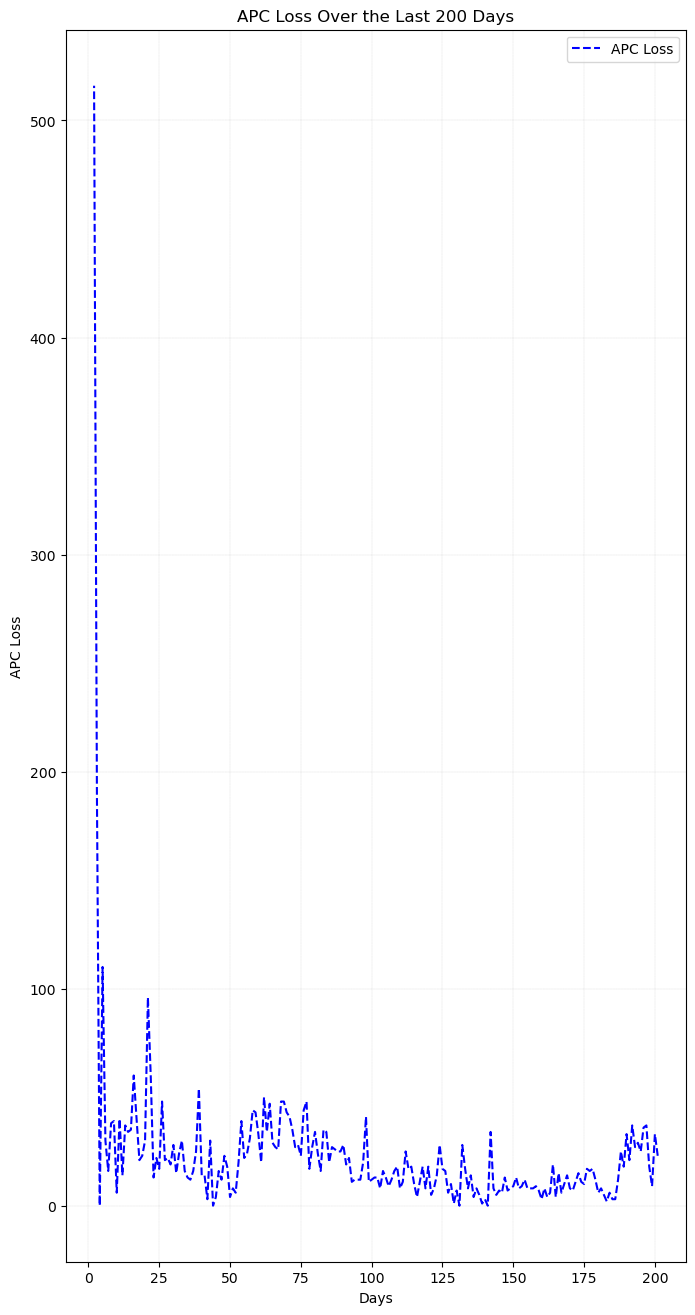

In [16]:
showChart()